MAE: 0.20812582537529925
MSE: 0.07068839767561799
RMSE: 0.2658728975951065


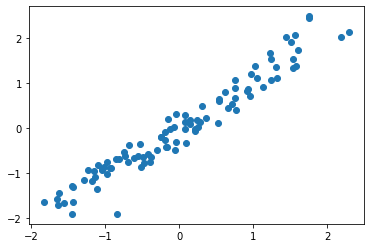

In [12]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

PM = pd.read_csv("DATA_SET.csv")

PM

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

x = PM[['Bore_Radius_mm','Bore_Hight_mm','Rim_Hight_mm','Bore_Width_mm','Web_Thick_mm']]
y = PM[['Max_Disp_m','Max_Von_Mises_Pa']]

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.2)

scaler = preprocessing.StandardScaler().fit(x_train)
scaler_y = preprocessing.StandardScaler().fit(y_train)
scalert = preprocessing.StandardScaler().fit(x_test)
scalert_y = preprocessing.StandardScaler().fit(y_test)

scaler

scaler_y

scalert
scalert_y

scaler.mean_

scaler_y.mean_

scalert.mean_
scalert_y.mean_

scaler.scale_

scaler_y.scale_

scalert.scale_
scalert_y.scale_

X_scaled = scaler.transform(x_train)

Y_scaled = scaler_y.transform(y_train)
Xt_scaled = scalert.transform(x_test)
Yt_scaled = scalert_y.transform(y_test)

X_scaled

Y_scaled

reg.fit(X_scaled,Y_scaled)

reg.coef_

reg.intercept_

predictions = reg.predict(Xt_scaled)

Yt_scaled

plt.scatter(Yt_scaled,predictions)

from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(Yt_scaled,predictions))
print('MSE:',metrics.mean_squared_error(Yt_scaled,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Yt_scaled,predictions)))

